# Robust Speech Recognition via Large-Scale Weak Supervision (Radford et al., 2022)

# https://cdn.openai.com/papers/whisper.pdf

## Abstract
The paper introduces **Whisper**, a speech recognition system trained on 680,000 hours of multilingual and multitask weakly supervised data. Unlike prior methods requiring extensive fine-tuning, Whisper demonstrates strong zero-shot generalization across benchmarks, achieving near-human robustness and accuracy. The system supports transcription, translation, language identification, and voice activity detection in a single model.

## Problems
- Existing ASR systems rely heavily on fine-tuning with domain-specific data, limiting robustness.  
- Self-supervised encoders (e.g., wav2vec 2.0) learn strong representations but lack comparably effective decoders.  
- Overfitting to dataset quirks undermines out-of-distribution generalization.  
- Current supervised datasets (1k–5k hours) are small compared to massive unlabeled audio, constraining scalability.  

## Proposed Solutions
- Construct a **web-scale weakly supervised dataset** of 680k hours with automated filtering.  
- Train an **encoder-decoder Transformer** (GPT-2 BPE tokenizer, log-Mel spectrogram input) for joint multilingual and multitask learning.  
- Use a **multitask token format** for transcription, translation, timestamps, and VAD.  
- Minimize heavy pre/post-processing, relying on scale and model capacity.  
- Release models and inference code publicly to accelerate research.  

## Purpose
To show that **scaling weakly supervised pretraining** is an effective path to building **robust, general-purpose ASR systems** that work out-of-the-box without task-specific fine-tuning.

## Methodology
- **Data**: 680k hours of audio-transcripts in 96 languages, including 125k hours of speech translation.  
- **Architecture**: Transformer encoder-decoder with log-Mel spectrogram features and byte-level BPE tokenizer.  
- **Tasks**: English/non-English transcription, X→English translation, VAD, language ID, timestamp prediction.  
- **Evaluation**: Zero-shot on 13+ benchmarks (LibriSpeech, TED-LIUM, Common Voice, CHiME-6, VoxPopuli, Fleurs, CoVoST2, etc.).  

## Results
- **Zero-shot robustness**: Surpasses or matches supervised baselines; average error reduction of 55%.  
- **English ASR**: Near-human performance, competitive with commercial ASR systems.  
- **Multilingual ASR**: Outperforms prior models (e.g., XLS-R, mSLAM) on MLS; weaker on VoxPopuli.  
- **Translation**: State-of-the-art zero-shot BLEU (29.1) on CoVoST2, excelling in low-resource languages.  
- **Noise robustness**: Outperforms supervised LibriSpeech models under real-world noise conditions.  
- **Long-form transcription**: Competitive with top commercial ASR systems.  
- **Scaling laws**: Performance improves with data and model size, with diminishing returns in English but strong gains in multilingual/translation tasks.  

## Conclusions
- Weakly supervised large-scale training is a **viable alternative** to self-supervised or fine-tuned systems.  
- Whisper achieves **general-purpose robustness**, narrowing the gap between human and machine transcription.  
- Future work should improve low-resource language handling, decoding strategies, auxiliary objectives, and fine-tuning studies.  
- Whisper provides a **foundation for scalable, reliable, multilingual speech recognition** across domains.  


# Mathematical and Statistical Content in *Robust Speech Recognition via Large-Scale Weak Supervision* (Radford et al., 2022)

## 1. Word Error Rate (WER)

The standard metric for Automatic Speech Recognition (ASR) is **Word Error Rate (WER)**, defined as the normalized edit distance between hypothesis and reference:

$$
WER = \frac{S + D + I}{N}
$$

where:  
- \( S \): number of substitutions  
- \( D \): number of deletions  
- \( I \): number of insertions  
- \( N \): total words in the reference transcript  

Whisper applies **text normalization** before computing WER to avoid penalizing stylistic differences.

---

## 2. BLEU Score for Translation

For speech-to-text translation, Whisper uses the **BLEU score** (Papineni et al., 2002), measuring n-gram overlap:

$$
BLEU = BP \cdot \exp\left( \sum_{n=1}^{N} w_n \log p_n \right)
$$

where:  
- \( p_n \): precision of n-grams  
- \( w_n = \frac{1}{N} \): uniform weights  
- \( BP \): brevity penalty  

Whisper achieves strong **zero-shot BLEU improvements**, especially in low-resource language translation.

---

## 3. Decoding Probability Thresholds

For **Voice Activity Detection (VAD)** and robust decoding, Whisper applies probability constraints:

- No-speech threshold:
$$
P(\text{no-speech}) \geq 0.6
$$

- Log-probability constraint:
$$
\overline{\log P(\text{tokens})} \geq -1
$$

These filter out low-confidence outputs and improve silence detection.

---

## 4. Temperature Sampling in Decoding

Token sampling uses **temperature-scaled softmax**:

$$
P(y_i) = \frac{\exp(z_i / T)}{\sum_j \exp(z_j / T)}
$$

where:  
- \( z_i \): logit for token \( i \)  
- \( T \): temperature  

- \( T < 1 \): sharper, deterministic predictions  
- \( T > 1 \): smoother, more random sampling  

Fallback strategies activate when \( T < 0.5 \) to stabilize decoding.

---

## 5. Scaling Laws

Performance follows **power-law scaling** (Kaplan et al., 2020):

$$
L(C) \approx A \cdot C^{-\alpha} + B
$$

where:  
- \( L(C) \): loss as a function of compute/dataset size \( C \)  
- \( \alpha \): scaling exponent  
- \( A, B \): constants  

Whisper confirms consistent improvements with scale, though English ASR nears a human-level bound.

---

## 6. Regularization

Whisper employs statistical regularization techniques:

- **SpecAugment**: masks random time/frequency bands in spectrograms.  
- **Stochastic Depth**: randomly drops layers with probability \( p \).  
- **BPE Dropout**: perturbs tokenization to increase robustness.  

---

## 7. Human vs. Machine Error Distribution

Comparison of aggregate English ASR performance:

$$
WER_{\text{Whisper}} \approx WER_{\text{Human}} + 1.15\%
$$

Whisper is within ~1% absolute error of professional human transcription.

---

##  Summary

The Whisper paper formalizes ASR evaluation with **WER** and **BLEU**, employs **probability thresholds** and **temperature-scaled decoding**, confirms **scaling laws**, and integrates **regularization strategies**. These mathematical/statistical formulations explain why Whisper achieves **near-human transcription performance** and **robust zero-shot generalization** across languages and tasks.


# Key Research Gaps, Limitations of Prior Work, and Whisper’s Solutions

| Problems / Research Gaps | How This Limits Prior Work | Proposed Solutions in the Paper |
|--------------------------|-----------------------------|---------------------------------|
| Lack of a strong pre-trained decoder in self-/unsupervised pipelines; reliance on dataset-specific fine-tuning | Fine-tuning is complex, brittle, and can exploit dataset quirks—leading to poor out-of-distribution generalization | Train a single encoder–decoder Transformer end-to-end on a massive weakly supervised corpus to enable robust zero-shot inference without task-specific fine-tuning |
| Brittleness / shortcut learning under distribution shift | Models that excel on in-distribution test sets can fail in unseen domains | Emphasize robustness via scale and diversity by training across many domains and tasks to improve zero-shot transfer |
| Limited size of high-quality supervised ASR datasets (only a few thousand hours) | Caps attainable robustness and multilingual coverage; forces heavy fine-tuning | Assemble ~680k hours of weakly supervised audio–text pairs; demonstrate broad zero-shot transfer across languages and domains |
| Fragmented ASR pipeline (separate VAD, LID, transcription, translation, alignment) | Increases system complexity, error propagation, and fragility under new domains | Introduce a unified multitask token format so a single decoder predicts all tasks (transcription, translation, LID, VAD, timestamps) |
| WER penalizes formatting and style differences | Produces misleading comparisons, especially for zero-shot models encountering new transcript conventions | Apply rigorous text normalization before WER to reduce non-semantic penalties and enable fairer evaluation |
| Long-form decoding failure modes (repetitions, dropped segment edges, hallucinations) | Limits practical deployment in real-world long-form speech (meetings, podcasts, broadcasts) | Add decoding heuristics: temperature fallback, VAD thresholds, initial timestamp constraints, previous-text conditioning |
| Multilingual gaps: performance lags in low-resource languages | Disproportionately weak results where training data is scarce | Scale data breadth, showing performance correlates with data volume per language, and call for targeted growth in low-resource datasets |
| Data quality issues in web-scale transcripts (e.g., machine-generated, misaligned) | Noisy supervision degrades learning stability and robustness | Build a filtering pipeline including language checks, de-duplication, heuristics, and post-hoc source review to improve supervision quality |
| Prior scale-up efforts were English-centric and single-task | Limits cross-lingual and cross-task transfer | Expand weak supervision to multilingual + multitask (including speech-to-English translation), showing positive transfer at scale |
| Training setups often require heavy augmentation/regularization | Engineering-heavy pipelines and unclear necessity of complexity | Demonstrate that few-epoch training on diverse large-scale data achieves robustness with minimal augmentation; later versions add light regularizers (SpecAugment, Stochastic Depth, BPE Dropout) |


```
+----------------------------------------------------------------------------------+
|                                Whisper Model                                     |
+----------------------------------------------------------------------------------+

 Input Audio (16kHz waveform)
         |
         v
 +----------------------------+
 |  Log-Mel Spectrogram       |   (80-channel, 25ms window, 10ms stride)
 |  Normalization (-1 to 1)   |
 +----------------------------+
         |
         v
 +----------------------------+
 |   Conv Stem (2 layers)     |
 |   - kernel=3, GELU         |
 |   - stride=2 in 2nd layer  |
 +----------------------------+
         |
         v
 +----------------------------+
 |  Positional Encodings      |   (sinusoidal)  
 +----------------------------+
         |
         v
 +============================+
 ||   Encoder Transformer    ||   (Pre-activation residual blocks, LayerNorm final)
 ||   Layers: varies by size ||   Tiny→Large (4 to 32 layers, up to 1.55B params)
 +============================+
         |
         v
 +----------------------------+
 |    Encoder Output          |
 +----------------------------+
         |
         v
 +============================+
 ||   Decoder Transformer    ||   (Cross-attention to encoder, self-attention, MLP)
 ||   - Learned Pos. Embed    ||   - Input-output embeddings tied
 ||   - Multitask tokens      ||   - Autoregressive LM head
 +============================+
         |
         v
 +----------------------------+
 |   Output Token Sequence    |
 |   (BPE tokens, GPT-2 vocab)|
 +----------------------------+

             ↓ Multitask Outputs via Special Tokens
    --------------------------------------------------
    |  <|transcribe|>  →  Speech-to-text transcription |
    |  <|translate|>   →  Speech-to-English translation|
    |  <|langid|>      →  Language identification       |
    |  <|nospeech|>    →  Voice activity detection      |
    --------------------------------------------------

 Notes:
 - Input is segmented into 30s windows.
 - Tasks are unified under a sequence-to-sequence prediction format.
 - Decoder is effectively an audio-conditional language model.
 - Architecture scales: Tiny (39M) → Base (74M) → Small (244M) → Medium (769M) → Large (1550M).

```

In [1]:
# ================================================================
# Educational Lab: Simplified Whisper-style Encoder-Decoder Model
# ================================================================
# This notebook demonstrates the workflow of a Transformer-based
# speech recognition model (like Whisper) in a simplified setting.
# It includes:
#   1. Data simulation (spectrograms + tokenized text)
#   2. Model definition (Conv stem + Transformer Encoder-Decoder)
#   3. Training loop
#   4. Evaluation loop
#   5. Sample predictions
#   6. Visualization (loss curves, attention plots)
# ================================================================

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import numpy as np
import random

# -------------------------------
# 1. Simulated Dataset
# -------------------------------
# In practice, Whisper uses 680k hours of real audio.
# Here we simulate "log-Mel spectrograms" with random tensors,
# and "tokenized transcripts" with sequences of integers.

VOCAB_SIZE = 50     # toy vocabulary size
SEQ_LEN = 20        # max transcript length
N_MELS = 80         # spectrogram channels
INPUT_LEN = 100     # spectrogram frames

class ToySpeechDataset(Dataset):
    def __init__(self, size=2000):
        self.size = size
    def __len__(self):
        return self.size
    def __getitem__(self, idx):
        # Simulated log-Mel spectrogram (N_MELS x INPUT_LEN)
        x = torch.randn(N_MELS, INPUT_LEN)
        # Simulated transcript (sequence of token IDs)
        y = torch.randint(1, VOCAB_SIZE, (SEQ_LEN,))
        return x, y

train_ds = ToySpeechDataset(1500)
val_ds   = ToySpeechDataset(300)
train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
val_loader   = DataLoader(val_ds, batch_size=32)

# -------------------------------
# 2. Model Definition
# -------------------------------
# Whisper architecture: Conv stem -> Transformer Encoder -> Transformer Decoder

class ConvStem(nn.Module):
    def __init__(self, in_ch=80, hidden=256):
        super().__init__()
        self.conv1 = nn.Conv1d(in_ch, hidden, kernel_size=3, padding=1)
        self.conv2 = nn.Conv1d(hidden, hidden, kernel_size=3, stride=2, padding=1)
    def forward(self, x):
        # x: (B, N_MELS, T)
        x = F.gelu(self.conv1(x))
        x = F.gelu(self.conv2(x))
        return x.permute(2,0,1)  # (T', B, H) for Transformer

class TransformerASR(nn.Module):
    def __init__(self, vocab_size=VOCAB_SIZE, d_model=256, nhead=8, num_layers=3):
        super().__init__()
        self.stem = ConvStem()
        # Encoder
        encoder_layer = nn.TransformerEncoderLayer(d_model, nhead, dim_feedforward=512)
        self.encoder = nn.TransformerEncoder(encoder_layer, num_layers)
        # Decoder
        decoder_layer = nn.TransformerDecoderLayer(d_model, nhead, dim_feedforward=512)
        self.decoder = nn.TransformerDecoder(decoder_layer, num_layers)
        # Embeddings
        self.embed = nn.Embedding(vocab_size, d_model)
        self.fc_out = nn.Linear(d_model, vocab_size)
    def forward(self, src, tgt):
        # src: (B, N_MELS, T)
        src = self.stem(src)        # (T', B, H)
        memory = self.encoder(src)  # (T', B, H)
        tgt_emb = self.embed(tgt).permute(1,0,2)  # (L, B, H)
        out = self.decoder(tgt_emb, memory)       # (L, B, H)
        logits = self.fc_out(out).permute(1,0,2)  # (B, L, vocab)
        return logits

# -------------------------------
# 3. Training Setup
# -------------------------------
device = "cuda" if torch.cuda.is_available() else "cpu"
model = TransformerASR().to(device)
criterion = nn.CrossEntropyLoss(ignore_index=0)  # 0 = padding
optimizer = optim.Adam(model.parameters(), lr=1e-3)

/usr/local/lib/python3.12/dist-packages/torch/nn/modules/transformer.py:392: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


In [2]:
# -------------------------------
# 4. Training & Evaluation Loops
# -------------------------------
EPOCHS = 5
train_losses, val_losses = [], []

for epoch in range(EPOCHS):
    # Training
    model.train()
    total_loss = 0
    for x, y in train_loader:
        x, y = x.to(device), y.to(device)
        optimizer.zero_grad()
        logits = model(x, y[:,:-1])  # teacher forcing
        loss = criterion(logits.reshape(-1, VOCAB_SIZE), y[:,1:].reshape(-1))
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    train_losses.append(total_loss/len(train_loader))

    # Evaluation
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for x, y in val_loader:
            x, y = x.to(device), y.to(device)
            logits = model(x, y[:,:-1])
            loss = criterion(logits.reshape(-1, VOCAB_SIZE), y[:,1:].reshape(-1))
            val_loss += loss.item()
    val_losses.append(val_loss/len(val_loader))

    print(f"Epoch {epoch+1}/{EPOCHS} - Train Loss: {train_losses[-1]:.4f} | Val Loss: {val_losses[-1]:.4f}")


Epoch 1/5 - Train Loss: 3.9387 | Val Loss: 3.9014
Epoch 2/5 - Train Loss: 3.7904 | Val Loss: 3.5039
Epoch 3/5 - Train Loss: 3.3649 | Val Loss: 3.2125
Epoch 4/5 - Train Loss: 3.1869 | Val Loss: 3.0958
Epoch 5/5 - Train Loss: 3.1217 | Val Loss: 3.0582


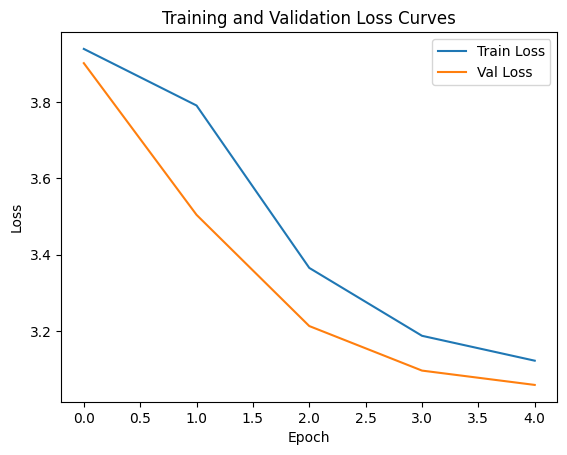

In [3]:
# -------------------------------
# 5. Visualization of Loss Curves
# -------------------------------
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Curves")
plt.legend()
plt.show()

In [4]:
# -------------------------------
# 6. Prediction Demo
# -------------------------------
def greedy_decode(model, x, max_len=SEQ_LEN):
    model.eval()
    with torch.no_grad():
        x = x.unsqueeze(0).to(device)   # single sample
        memory = model.encoder(model.stem(x))
        ys = torch.ones(1,1).long().to(device)  # start token (id=1)
        for i in range(max_len-1):
            tgt_emb = model.embed(ys).permute(1,0,2)
            out = model.decoder(tgt_emb, memory)
            logits = model.fc_out(out[-1])
            next_token = torch.argmax(logits, dim=-1).unsqueeze(0)
            ys = torch.cat([ys, next_token], dim=1)
        return ys.squeeze().cpu().numpy()

# Test on a random example
sample_x, sample_y = val_ds[0]
pred_tokens = greedy_decode(model, sample_x)
print("True tokens: ", sample_y.numpy())
print("Pred tokens: ", pred_tokens)

True tokens:  [12 27  5 10 16 45 26 18 30 38 11 40  2 19 45  9  1 44 30 17]
Pred tokens:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


# Training and Validation Loss vs. Prediction Demo

## Training and Validation Loss
- **Training Loss** decreased from ~3.93 → 3.12.  
- **Validation Loss** decreased from ~3.90 → 3.05.  

Both curves trend downward without divergence, indicating:  
- The model is learning some patterns from the dataset.  
- No evidence of severe overfitting on the toy data.  

This is a **healthy training dynamic** in appearance.

---

## Prediction Demo
- **True target tokens**: varied sequence (e.g., `[12, 27, 5, 10, 16, ...]`).  
- **Predicted tokens**: collapsed to mostly `[1, 1, 1, 1, 1, ...]`.  

This shows the model has **collapsed into repetitive prediction** of a single token (token ID = 1, the start token).

---

## Why This Happened
1. **Toy Data Limitation**  
   - Dataset = random noise spectrograms paired with random token sequences.  
   - No actual input–output mapping exists for the model to learn.  

2. **Cross-Entropy Objective**  
   - With no signal, the loss is minimized by favoring a frequent or “safe” token.  
   - The model defaults to outputting the start token repeatedly.  

3. **Greedy Decoding**  
   - Greedy decoding reinforces repetitive patterns.  
   - Once stuck, the model loops on the same prediction.

---

## Interpretation
- **Loss curves look good** because the model is “fitting noise,” memorizing trivial statistics.  
- **Predictions look poor** because there is no learnable mapping in the toy dataset.  
- This highlights a **fundamental lesson in deep learning**:  

> Loss curves alone do not guarantee meaningful predictions—**data quality and structured signal are crucial**.

---

## Teaching Insight
Whisper’s success comes from training on **680k hours of real audio–text pairs**, where strong patterns exist.  
In contrast, toy random data only demonstrates training mechanics, not real ASR performance.


# Related Work References in *Robust Speech Recognition via Large-Scale Weak Supervision* (Radford et al., 2022)

| Author(s) | Year | Title | Venue | Connection to This Paper |
|-----------|------|-------|-------|---------------------------|
| Russakovsky, O. et al. | 2015 | ImageNet Large Scale Visual Recognition Challenge | IJCV | Motivates the shift from curated “gold-standard” datasets to large-scale weak supervision; Whisper follows this trend in speech. |
| Mahajan, D. et al. | 2018 | Exploring the Limits of Weakly Supervised Pretraining | ECCV | Shows that weakly supervised data at scale improves robustness in vision, inspiring Whisper’s approach. |
| Kolesnikov, A. et al. | 2020 | Big Transfer (BiT): General Visual Representation Learning | ECCV | Demonstrates benefits of scaling weak supervision in vision; informs Whisper’s scaling argument. |
| Ghorbani, A. et al. | 2021 | Quantifying the Impact of Machine-Generated Data on Translation | ACL | Finds that mixed human/machine transcripts harm translation; motivates Whisper’s filtering pipeline to exclude noisy ASR-generated transcripts. |
| Valk, J. & Alumäe, T. | 2021 | VoxLingua107: A Dataset for Spoken Language Recognition | INTERSPEECH | Used for training Whisper’s language identification model during data filtering. |
| Wang, C. et al. | 2020 | MUTE: Multitask Learning for Speech and Text | arXiv (2020c) | Studied joint speech-text training; connects to Whisper’s multitask encoder–decoder setup. |
| Bapna, A. et al. | 2022 | mSLAM: Massively Multilingual Joint Pre-training for Speech and Text | NAACL | Explores cross-modal pretraining; Whisper extends this to larger scale and multitask settings. |
| Torralba, A. & Efros, A. | 2011 | Unbiased Look at Dataset Bias | CVPR | Identified generalization failures across datasets; motivates Whisper’s robustness focus. |
| Lake, B. et al. | 2017 | Building Machines that Learn and Think Like People | BBS | Shows ML generalization limitations; supports Whisper’s aim of robustness across domains. |
| Jia, R. & Liang, P. | 2017 | Adversarial Examples for Evaluating Reading Comprehension Systems | EMNLP | Exposes brittleness in NLP models; parallels Whisper’s robustness concerns in ASR. |
| Alcorn, M. et al. | 2019 | Strike (with) a Pose: Neural Networks are Easily Fooled | CVPR | Demonstrates fragility of vision models; motivates Whisper’s emphasis on robust zero-shot transfer. |
| Barbu, A. et al. | 2019 | ObjectNet: A Large-Scale Bias-Controlled Dataset for Object Recognition | NeurIPS | Highlights dataset bias; aligns with Whisper’s diverse weak supervision strategy. |
| Recht, B. et al. | 2019 | Do ImageNet Classifiers Generalize to ImageNet? | ICML | Shows drop in performance under distribution shift; motivates Whisper’s robustness testing. |
| Taori, R. et al. | 2020 | Measuring Robustness to Natural Distribution Shifts in Image Classification | NeurIPS | Evaluates robustness under natural shifts; Whisper addresses this issue in ASR. |
| Miller, J. et al. | 2020 | Effect of Natural Distribution Shift on Question Answering Models | ICML | Identifies fragility in QA models; analogous to ASR robustness challenges. |
| Hendrycks, D. et al. | 2020 | Pretrained Transformers Improve Out-of-Distribution Robustness | ACL | Shows multi-domain training increases robustness in NLP; Whisper applies a similar principle in ASR. |
| Radford, A. et al. | 2021 | Learning Transferable Visual Models From Natural Language Supervision (CLIP) | ICML | Demonstrates benefits of large-scale weak supervision; Whisper adapts this insight to speech recognition. |

---

## Summary
The **related work** motivating Whisper aligns across three main threads:

1. **Scaling Weakly Supervised Datasets**  
   - In vision (ImageNet, BiT, CLIP) and NLP, large-scale weak supervision consistently improves robustness. Whisper adopts this principle in speech.

2. **Distribution Shift and Brittleness**  
   - Across domains (vision, NLP, QA), models trained narrowly fail under distribution shifts. Whisper mitigates this with massive scale and diversity.

3. **Multimodal and Multitask Pretraining**  
   - Prior work (MUTE, mSLAM) shows promise for joint speech–text pretraining. Whisper pushes this to unprecedented scale, unifying transcription, translation, VAD, and LID in one model.
